<a href="https://colab.research.google.com/github/Ma02rwa/project1/blob/main/miniprojet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss, confusion_matrix

In [104]:
data = pd.read_csv("/content/Thyroid-Dataset.csv")
data = data.replace('?', np.nan)

<ipython-input-104-da220d57f231>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace('?', np.nan)


In [105]:
binary_columns = [
    "on thyroxine", "query on thyroxine", "on antithyroid medication",
    "sick", "pregnant", "thyroid surgery", "I131 treatment",
    "query hypothyroid", "query hyperthyroid", "lithium", "goitre",
    "tumor", "hypopituitary", "psych", "TSH measured", "T3 measured",
    "TT4 measured", "T4U measured", "FTI measured", "TBG measured"
]
for col in binary_columns:
    data[col] = data[col].map({'t': 1, 'f': 0})

In [106]:
numeric_columns = ["age", "TSH", "T3", "TT4", "T4U", "FTI", "TBG"]
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Ensure numeric conversion
    data[col] = data[col].fillna(data[col].median())  # Fill missing with median

In [107]:
data['binaryClass'].unique()

array(['P', 'N'], dtype=object)

In [108]:
data['binaryClass'] = data['binaryClass'].map({'P': 1, 'N': 0})


In [109]:
data = data.dropna(subset=['binaryClass'])


In [110]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())


In [111]:
# Handle missing values in categorical columns (replace with mode)
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [112]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   float64
 1   sex                        3772 non-null   object 
 2   on thyroxine               3772 non-null   int64  
 3   query on thyroxine         3772 non-null   int64  
 4   on antithyroid medication  3772 non-null   int64  
 5   sick                       3772 non-null   int64  
 6   pregnant                   3772 non-null   int64  
 7   thyroid surgery            3772 non-null   int64  
 8   I131 treatment             3772 non-null   int64  
 9   query hypothyroid          3772 non-null   int64  
 10  query hyperthyroid         3772 non-null   int64  
 11  lithium                    3772 non-null   int64  
 12  goitre                     3772 non-null   int64  
 13  tumor                      3772 non-null   int64

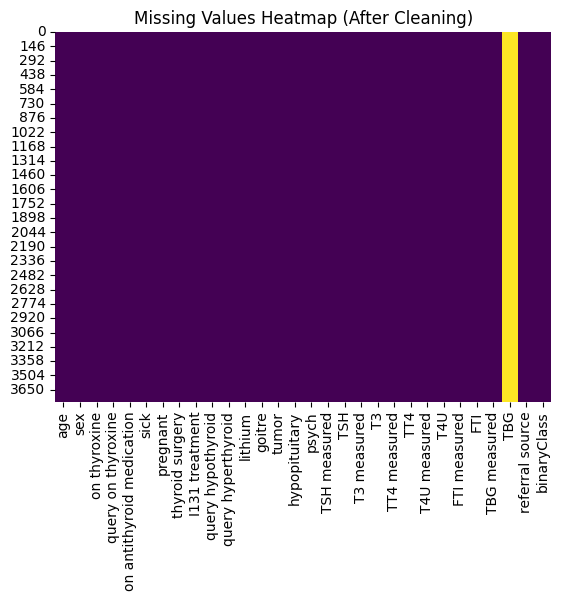

In [113]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (After Cleaning)")
plt.show()

In [114]:
print(data['binaryClass'].value_counts())

binaryClass
1    3481
0     291
Name: count, dtype: int64


In [115]:
X = data.drop("binaryClass", axis = 1)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummies
X = pd.DataFrame(X).fillna(0)

In [116]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [117]:
y = data["binaryClass"]
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 42)

In [118]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class


In [119]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy : .2f}")

Accuracy:  0.97


In [120]:
loss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {loss:.4f}")

Log Loss: 0.1060


In [121]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.57      0.72        81
           1       0.97      1.00      0.98      1051

    accuracy                           0.97      1132
   macro avg       0.97      0.78      0.85      1132
weighted avg       0.97      0.97      0.96      1132



In [122]:
conf_matrix = confusion_matrix(y_test, y_pred)


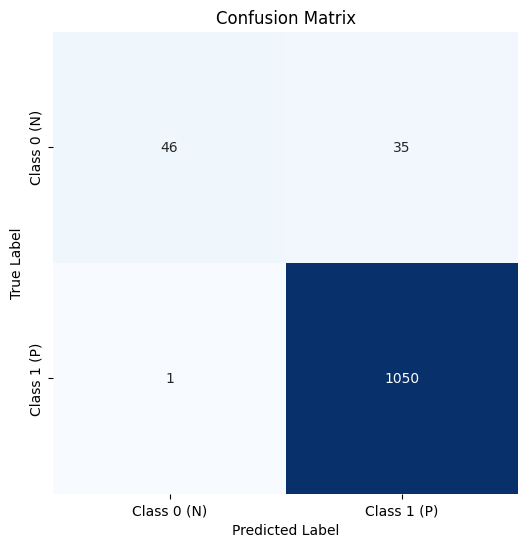

In [123]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0 (N)', 'Class 1 (P)'],
            yticklabels=['Class 0 (N)', 'Class 1 (P)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [124]:
plt.figure(figsize=(10, 6))
epochs = list(range(1, len(y_test) + 1))

<Figure size 1000x600 with 0 Axes>

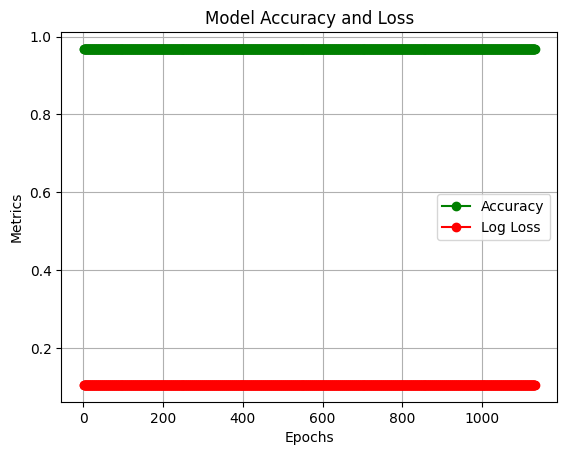

In [125]:
# Accuracy and Loss graph
plt.plot(epochs, [accuracy] * len(epochs), label='Accuracy', marker='o', color='green')
plt.plot(epochs, [loss] * len(epochs), label='Log Loss', marker='o', color='red')
plt.title("Model Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.legend()
plt.grid()
plt.show()